In [1]:
# IMDB - 2 layer network - train + validation + test, 20 epochs, 512 batch size (Keras version 2.2.4)
# notes:
# - this is the code sample implemented following "Deep Learning for Python" book by Francois Chollet
import numpy as np

from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers

import tensorflow as tf
from keras import backend as k_backend

#------------
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
k_backend.set_session(sess)
#------------

#network parameters
n_input = 10000 #input size for a single sample (10000 words)

#hyperparamters
batch_size = 512
eta = 0.001 #learning rate for optimizer
max_epoch = 20 

# 1. get data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=n_input)

#pre-process data into tensors
def vectorize_sequences(sequences, dimension=n_input):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test =  vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#validation set to use during training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. network architecture
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 3. select optimizer and loss

model.compile(optimizer = optimizers.RMSprop(lr=eta), loss = 'binary_crossentropy', metrics= ['accuracy'])

# 4. train / run network

history = model.fit(partial_x_train, partial_y_train, epochs = max_epoch, batch_size= batch_size, validation_data=(x_val, y_val))

#results = model.evaluate(x_test, y_test)
#print(results)

y_pred_bool = model.predict_classes(x_test, batch_size=64, verbose=1)

#predict and display per class accuracy
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_bool))

# 5. test model
correct_prediction = y_pred_bool.reshape(len(y_test,)) == y_test
accuracy = np.mean(correct_prediction)
print("test_acc:",accuracy)




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Ep

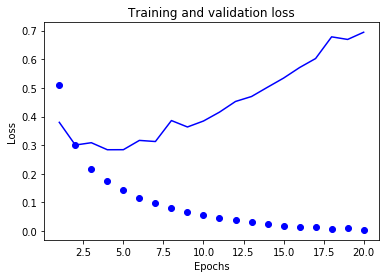

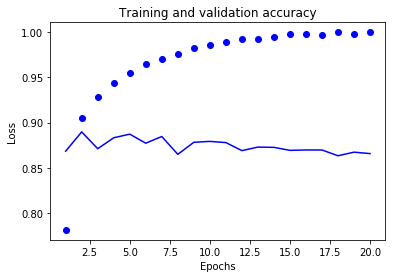

In [2]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label ='Training loss')
plt.plot(epochs, val_loss_values, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label ='Training loss')
plt.plot(epochs, val_acc_values, 'b', label ='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.show()

